In [28]:
import matplotlib.pyplot as plt

In [1]:
import random

# One way to do it
random_trials = []
for i in range(1,50):
    random_trials.append(random.choice([0,1]))
    print(f"iteration {i}")
    print(f"random_trials contains {random_trials}")
    print(sum(random_trials) / len(random_trials))
    print(f"End of iteration {i} \n\n")

iteration 1
random_trials contains [1]
1.0
End of iteration 1 


iteration 2
random_trials contains [1, 0]
0.5
End of iteration 2 


iteration 3
random_trials contains [1, 0, 0]
0.3333333333333333
End of iteration 3 


iteration 4
random_trials contains [1, 0, 0, 1]
0.5
End of iteration 4 


iteration 5
random_trials contains [1, 0, 0, 1, 0]
0.4
End of iteration 5 


iteration 6
random_trials contains [1, 0, 0, 1, 0, 0]
0.3333333333333333
End of iteration 6 


iteration 7
random_trials contains [1, 0, 0, 1, 0, 0, 1]
0.42857142857142855
End of iteration 7 


iteration 8
random_trials contains [1, 0, 0, 1, 0, 0, 1, 0]
0.375
End of iteration 8 


iteration 9
random_trials contains [1, 0, 0, 1, 0, 0, 1, 0, 0]
0.3333333333333333
End of iteration 9 


iteration 10
random_trials contains [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
0.3
End of iteration 10 


iteration 11
random_trials contains [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
0.36363636363636365
End of iteration 11 


iteration 12
random_trials contains [

In [2]:
# Better way to do it

random_trials = [random.choice([0,1]) for _ in range(1, 100)]
sum(random_trials)

48

In [6]:
# cumsum()

import numpy as np

cumsum_random_trials = np.cumsum(random_trials)

print("=" * 30)
print(random_trials[0:10])

print("=" * 30)
print(list(cumsum_random_trials[0:10]))

[1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 2, 2, 3, 3, 3, 3, 3, 3]


In [16]:
#print(range(1, len(cumsum_random_trials + 1)))
cum_prop_heads = cumsum_random_trials / range(1, len(cumsum_random_trials)+1)

print("=" * 30)
print(random_trials[0:6])
print("=" * 30)
print(list(cumsum_random_trials[0:6]))
print("=" * 30)
print(list(cum_prop_heads[0:6]))

[1, 0, 1, 0, 1, 0]
[1, 1, 2, 2, 3, 3]
[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5]


In [19]:
from itertools import compress

def monty_hall(n=10_1000, switch = False):
    nb_wins = 0
    doors = np.array(["GOAT", "CAR", "GOAT"])
    for i in range(n):
        random.shuffle(doors)
        my_pick = random.choice([0, 1, 2])
        remaining_doors = list(set([0,1,2]).difference([my_pick]))
        goat_doors = list(compress(remaining_doors, doors[remaining_doors] == "GOAT"))
        reveal_door = random.choice(goat_doors)
        if switch:
            my_pick = list(set([0, 1, 2]).difference([my_pick, reveal_door]))[0]
        if doors[my_pick] == "CAR":
            nb_wins += 1
    return nb_wins

In [20]:
monty_hall(n=100_000, switch = True)

66643

In [21]:
monty_hall(n=100_000, switch = False)

33365

In [22]:
# Non-Uniform Probabilities
# Problem 1: In 100 people, 3 will volunteer
# what is the probability of getting 30 people if you sent out 1200 emails

# In 100 people, 3 will volunteer
population = [0] * 97 + [1] * 3

In [26]:
def get_random_sample (population, nb_samples):
    nb_volunteers = 0
    for _ in range(nb_samples):
        nb_volunteers += random.choice(population)
    return nb_volunteers

In [27]:
get_random_sample(population, 1200)

34

In [29]:
nb_satisfied = 0
nb_trials = 10000
nb_volunteers_per_exp = []
for i in range(nb_trials):
    nb_volunteers = get_random_sample(population, 1200)
    nb_volunteers_per_exp.append(nb_volunteers)


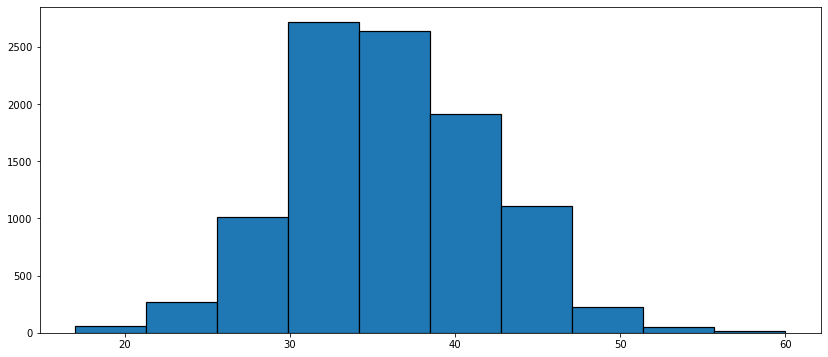

In [30]:
plt.figure(figsize=(14, 6))
_ = plt.hist(nb_volunteers_per_exp, edgecolor='black', linewidth=1.2)

In [31]:
nb_satisfied = sum(np.array(nb_volunteers_per_exp) > 30)

nb_satisfied

8252

In [32]:
print(nb_satisfied/nb_trials)

0.8252


In [33]:
import numpy as np
import random

In [34]:
die_choice = [1,2,3,4,5,6]

In [48]:
random.choice(die_choice)

5

In [43]:
die_result = []
for i in range(1, 120_000_000):
    die_result.append(random.choice(die_choice))

In [44]:
import pandas as pd

In [45]:
from collections import Counter

In [49]:
pd.Series(Counter(die_result))/120_000_000

3    0.166730
6    0.166631
1    0.166666
4    0.166695
2    0.166678
5    0.166598
dtype: float64

In [50]:
print(1/6)

0.16666666666666666


In [52]:
import pandas as pd
import random
data = pd.Series([1,1,1,1,1,1,1,1, 2,3,4,5,6])

In [53]:
data.value_counts()

1    8
2    1
3    1
4    1
5    1
6    1
dtype: int64

In [54]:
outcome = data.value_counts()

outcome

1    8
2    1
3    1
4    1
5    1
6    1
dtype: int64

In [55]:
prob = outcome / outcome.sum()

In [58]:
data_f = pd.DataFrame({"Outcome": outcome , "Probabilities": prob})

In [59]:
data_f

,Outcome,Probabilities
1,8,0.615385
2,1,0.076923
3,1,0.076923
4,1,0.076923
5,1,0.076923
6,1,0.076923


In [60]:
# Probability Distribution

{1: 513, 2: 1139, 3: 3367, 4: 838, 5: 689, 6: 3454}


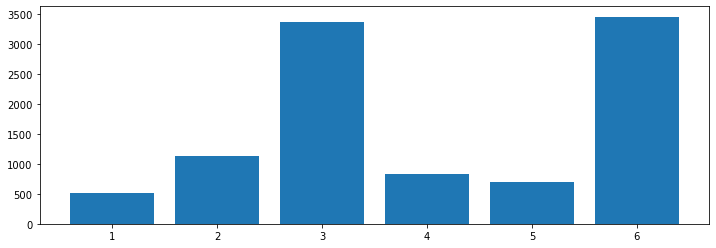

In [63]:
from collections import Counter

roll_random_var_list = np.random.choice([1,2,3,4,5,6], size = 10000,
                                       p=[0.3/6, 0.7/6, 2/6, 0.5/6, 0.4/6, 2.1/6])

counts = Counter(roll_random_var_list)

sorted_counts = dict(sorted(counts.items()))
print (sorted_counts)

plt.figure(figsize=(12, 4))
_ = plt.bar(sorted_counts.keys(), sorted_counts.values())

In [64]:
from scipy.stats import binom

n = 10 
p = 0.5
binom.pmf(3, n, p)

0.1171875

In [67]:
(38.3 + 42.5 + 59.1 + 67.9 + 76.1) / 5

56.779999999999994

In [69]:
import statistics as st
values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

avg = st.mean(values)
avg

5

In [72]:
set_a = [1,1,1,2,2,2,100,100,100,100]
set_b = [0,0,1,1,1,2,2,2,2,100]

mean_a = st.mean(set_a)
median_a = st.median(set_a)
mode_a = st.mode(set_a)

mean_b = st.mean(set_b)
median_b = st.median(set_b)
mode_b = st.mode(set_b)

print (median_a < mode_a < mean_a)
print (median_b < mode_b < mean_b)

False
True
